In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [136]:
df=pd.read_csv('AB_NYC_2019.csv')

In [137]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [138]:
len(df)

48895

In [139]:
df.shape

(48895, 16)

In [140]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [141]:
# null data - filling with zero
df = df.fillna(0)


In [142]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

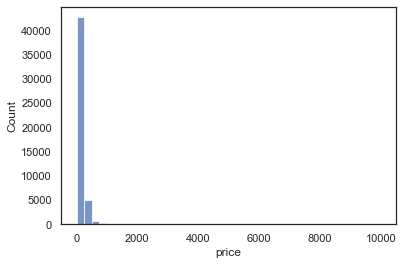

In [143]:
sns.histplot(df.price , bins=40)

<AxesSubplot:xlabel='price', ylabel='Count'>

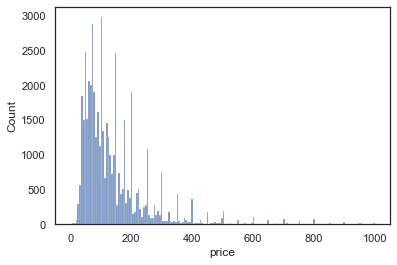

In [144]:
sns.histplot(df.price[df.price < 1000])

/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='price', ylabel='Count'>

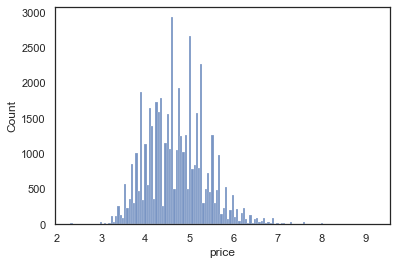

In [145]:
sns.histplot(np.log(df.price))

In [146]:
df['upper'] = df['price'].mean() + 3*df['price'].std()
df['lower'] = df['price'].mean() - 3*df['price'].std()


In [147]:
df.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365       upper       lower  
0                               6               365  873.183196 -567.741822  
1                               2               355  873.183196 -567.741822

In [148]:
#out layer data
ix = (df.price < df.upper) & (df.price > df.lower )
df_clean=df.loc[ix]
len(df_clean)

48507

In [15]:
sns.histplot(df_clean.price , kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

In [16]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(y='price', data=df_clean).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

<AxesSubplot:title={'center':'total number of houses in neighbourhood'}, xlabel='neighbourhood_group'>

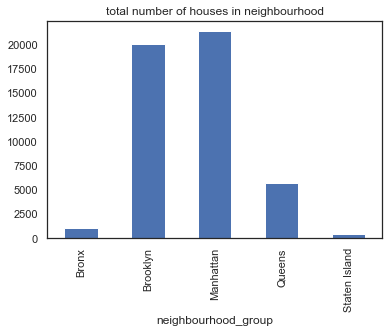

In [17]:
df_nei1=df_clean.groupby(['neighbourhood_group']).count()['id']
df_nei1.plot.bar(title='total number of houses in neighbourhood')

<AxesSubplot:title={'center':'total listings by neighbourhood'}, ylabel='neighbourhood'>

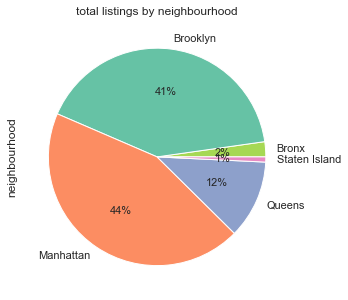

In [18]:
df_nei1.plot.pie(ylabel='neighbourhood' , title='total listings by neighbourhood' , autopct='%1.0f%%', fontsize='11', colors=['#a6d854', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
             startangle=0, figsize=(5,5))

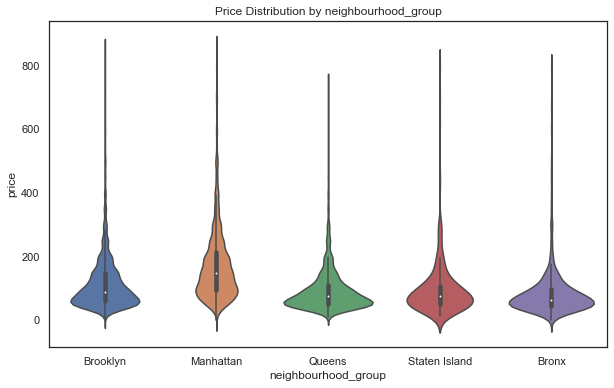

In [19]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df_clean).set_title('Price Distribution by neighbourhood_group')
plt.show()

<AxesSubplot:title={'center':'average price by neighybourhood'}, xlabel='neighbourhood_group'>

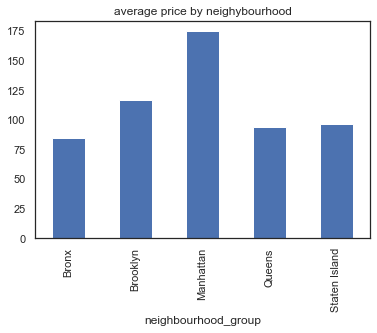

In [20]:
price_mean=df_clean.groupby(['neighbourhood_group'])['price'].mean()
price_mean.plot.bar(title='average price by neighybourhood' )

In [21]:
df0=df_clean.groupby(['neighbourhood_group','room_type']).mean()['price']
df0

neighbourhood_group  room_type      
Bronx                Entire home/apt    125.198413
                     Private room        63.050691
                     Shared room         59.800000
Brooklyn             Entire home/apt    166.539798
                     Private room        72.228212
                     Shared room         50.527845
Manhattan            Entire home/apt    219.733611
                     Private room       106.816715
                     Shared room         87.075157
Queens               Entire home/apt    140.808816
                     Private room        67.757720
                     Shared room         49.312821
Staten Island        Entire home/apt    134.953757
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

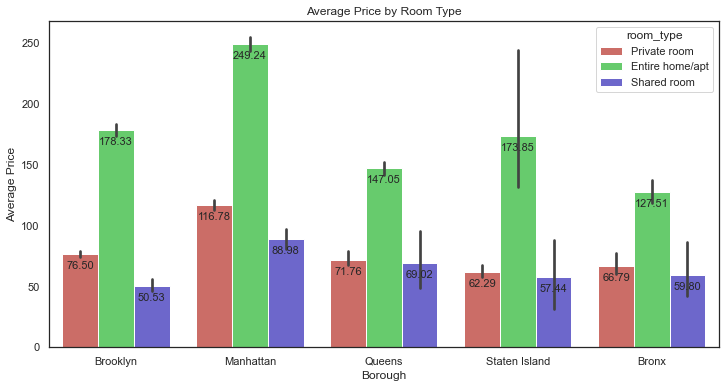

In [22]:
plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df = sns.barplot(x="neighbourhood_group", y="price", data=df, hue='room_type', palette='hls')
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


In [25]:
df_clean.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365       upper       lower  
0                               6               365  873.183196 -567.741822  
1                               2               355  873.183196 -567.741822

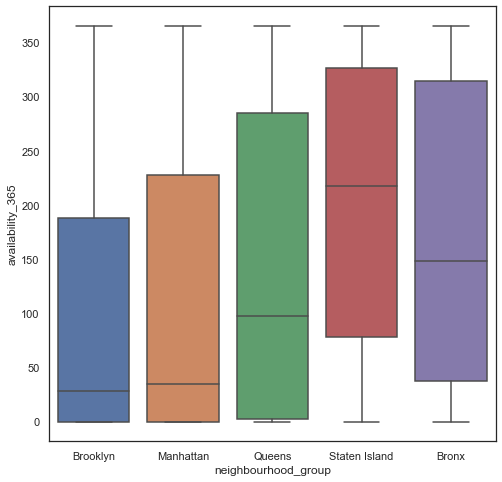

In [43]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df_clean, x='neighbourhood_group',y='availability_365')

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

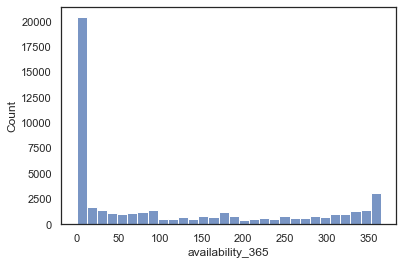

In [24]:
sns.histplot(df_clean['availability_365'])

/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


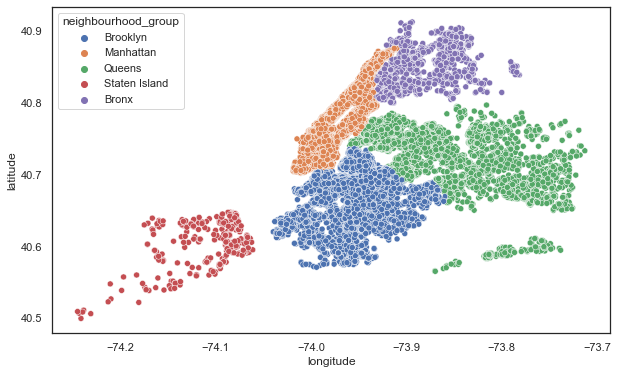

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_clean.longitude, df_clean.latitude, hue=df_clean.neighbourhood_group)
plt.ioff()

/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


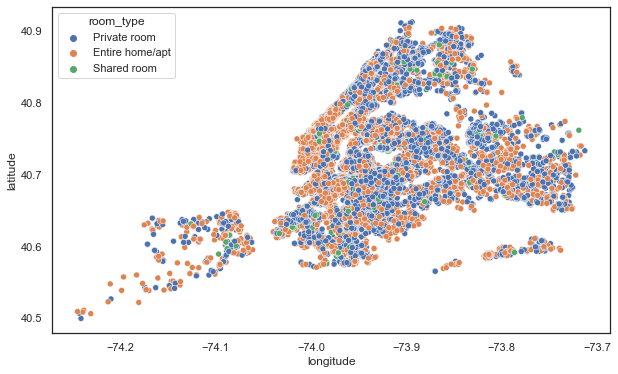

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_clean.longitude, df_clean.latitude, hue=df_clean.room_type)
plt.ioff()

/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


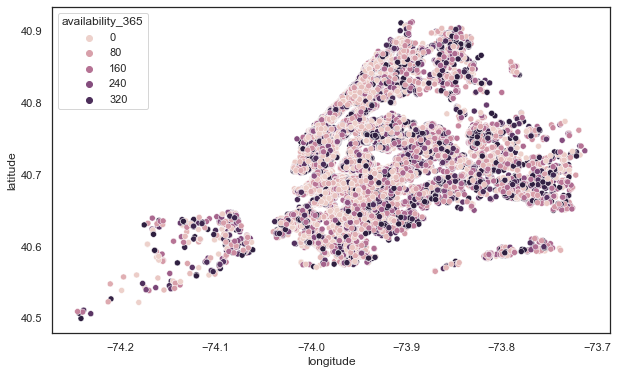

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_clean.longitude, df_clean.latitude, hue=df_clean.availability_365)
plt.ioff()

In [32]:
top10_host = df_clean.host_id.value_counts().head(10).index
top10_host_vis=df_clean.loc[df_clean['host_id'].isin(top10_host)]
top10_host

Int64Index([219517861, 107434423,  30283594, 137358866,  16098958,  12243051,
             61391963,  22541573, 200380610,   7503643],
           dtype='int64')

Text(0, 0.5, 'Number of Airbnb')

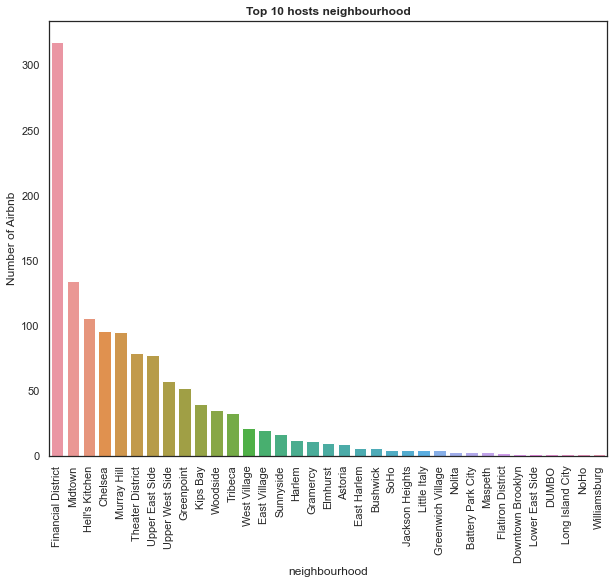

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data=top10_host_vis,x='neighbourhood',order = top10_host_vis['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Top 10 hosts neighbourhood",weight='bold')
plt.ylabel('Number of Airbnb')

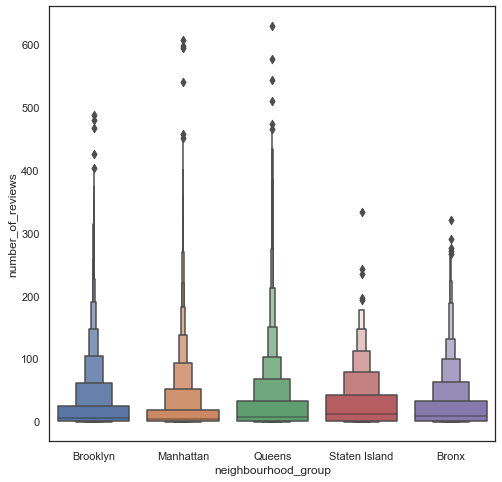

In [38]:
plt.figure(figsize=(8,8))
ax = sns.boxenplot(data=df_clean, x='neighbourhood_group',y='number_of_reviews')

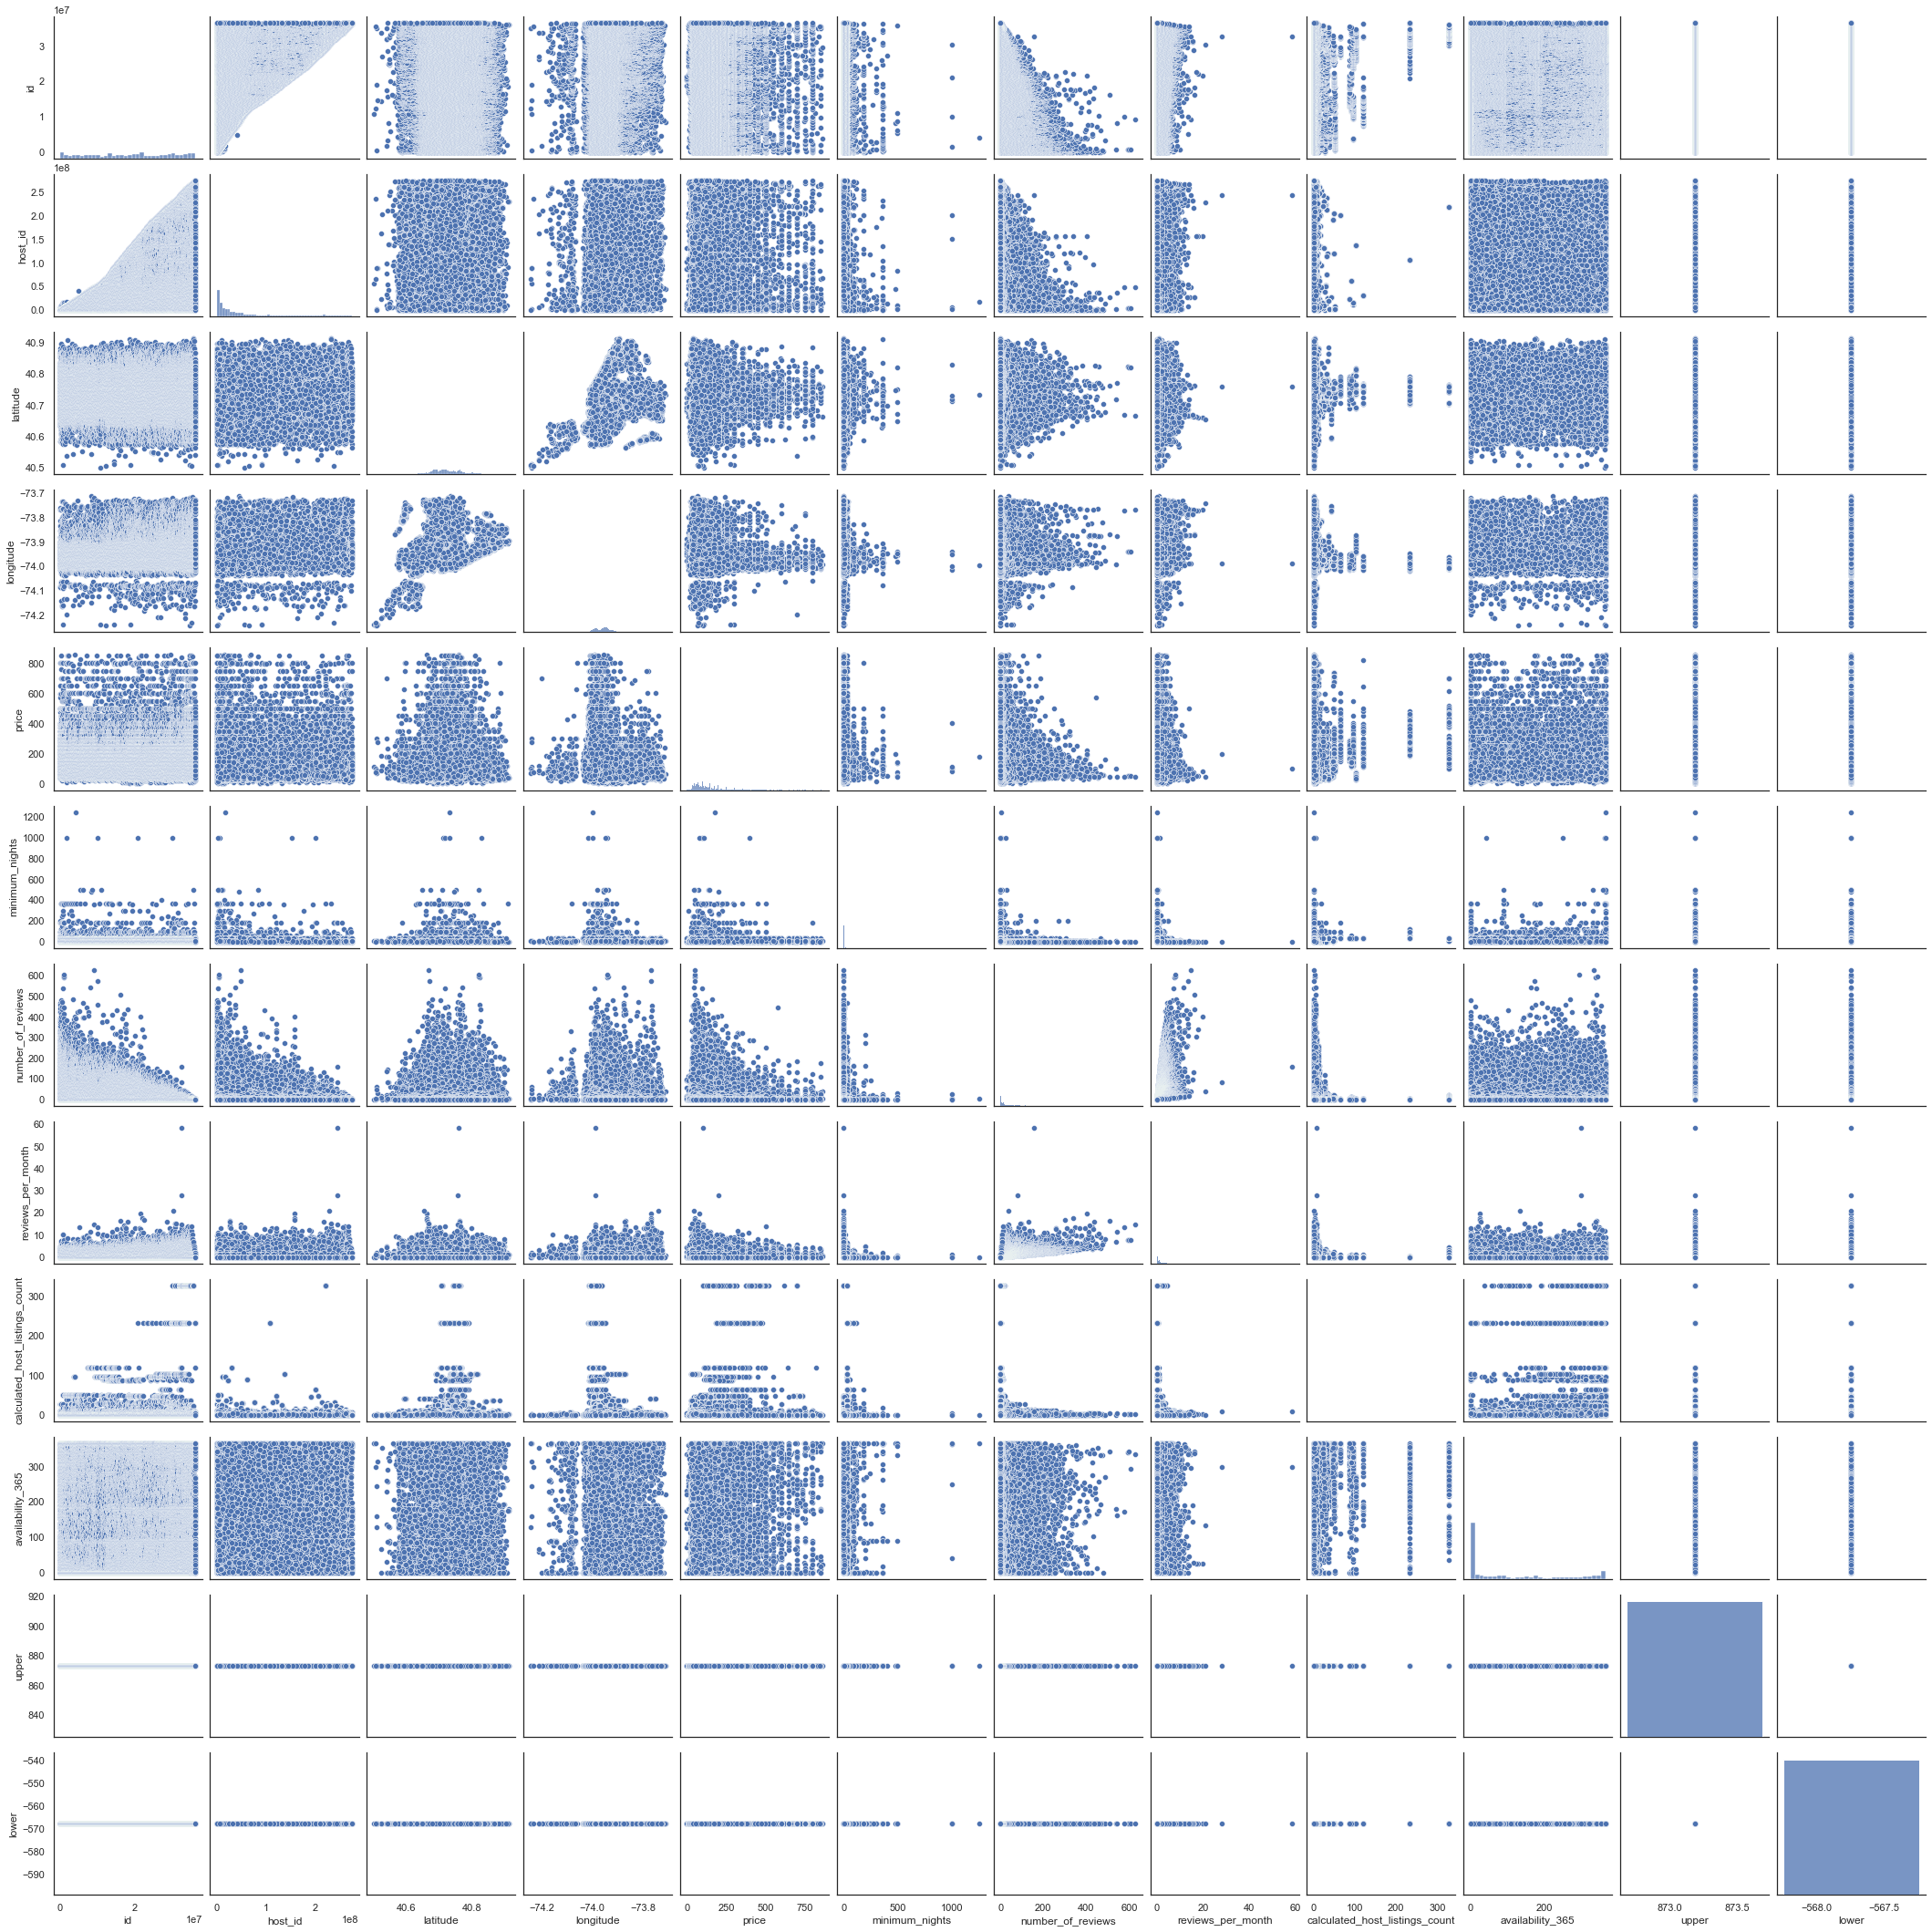

In [39]:
sns.pairplot(df_clean)


In [44]:
df_clean.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365       upper       lower  
0                               6               365  873.183196 -567.741822  
1                               2               355  873.183196 -567.741822

In [100]:
#which hosts are the busiest
host_ids = host_df.index.tolist() 
host_ids
#we are using the list of the 15 most popular host ids
selected = df_clean.loc[df_clean['host_id'].isin(host_ids)]
grouped_hosts = selected.groupby('host_id')

<AxesSubplot:xlabel='host_id'>

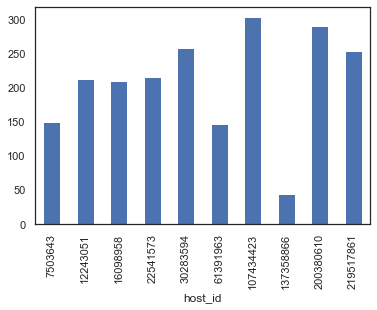

In [106]:
grouped_hosts['price'].mean().plot.bar()


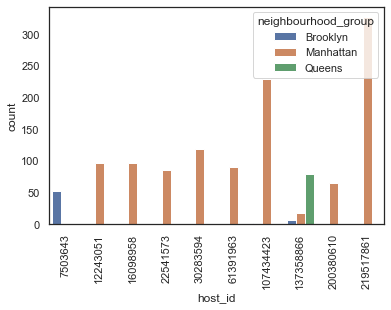

In [103]:
chart = sns.countplot(x='host_id',hue='neighbourhood_group',data=selected,orient='v')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [97]:
host_df=df_clean.host_id.value_counts().head(10)
host_df

219517861    327
107434423    232
30283594     118
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

<AxesSubplot:>

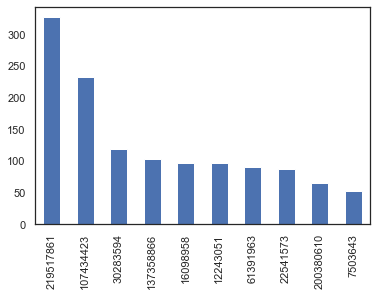

In [99]:
host_df.plot.bar()

hypothesis tests 

In [110]:
df_clean.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365       upper       lower  
0                               6               365  873.183196 -567.741822  
1                               2               355  873.183196 -567.741822

In [113]:
from scipy.stats import shapiro
data = df_clean['price']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.776, p=0.000
Probably not Gaussian


In [117]:
from scipy.stats import anderson
data = df_clean['number_of_reviews']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=7002.555
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [111]:
from scipy.stats import pearsonr
data1 = df_clean['number_of_reviews']
data2 = df_clean['price']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.056, p=0.000
Probably dependent


In [115]:
from scipy.stats import spearmanr
data1 = df_clean['number_of_reviews']
data2 = df_clean['price']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.047, p=0.000
Probably dependent


In [116]:
from scipy.stats import kendalltau
data1 = df_clean['number_of_reviews']
data2 = df_clean['price']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.033, p=0.000
Probably dependent


In [118]:
from statsmodels.tsa.stattools import adfuller
data = df_clean['price']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-22.925, p=0.000
Probably Stationary


In [119]:
y = pd.get_dummies(df_clean.room_type, prefix='Country')
print(y.head())

   Country_Entire home/apt  Country_Private room  Country_Shared room
0                        0                     1                    0
1                        1                     0                    0
2                        0                     1                    0
3                        1                     0                    0
4                        1                     0                    0


In [120]:
from scipy.stats import kendalltau
data1 = y['Country_Private room']
data2 = df_clean['price']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.517, p=0.000
Probably dependent


In [121]:
y1 = pd.get_dummies(df_clean.neighbourhood_group, prefix='Country')
print(y1.head())

   Country_Bronx  Country_Brooklyn  Country_Manhattan  Country_Queens  \
0              0                 1                  0               0   
1              0                 0                  1               0   
2              0                 0                  1               0   
3              0                 1                  0               0   
4              0                 0                  1               0   

   Country_Staten Island  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


In [122]:
from scipy.stats import kendalltau
data1 = y1['Country_Manhattan']
data2 = df_clean['price']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.296, p=0.000
Probably dependent


price prediction

In [124]:
df_clean.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365       upper       lower  
0                               6               365  873.183196 -567.741822  
1                               2               355  873.183196 -567.741822

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['neighbourhood_group'] = le.fit_transform(df_clean['neighbourhood_group'])
df_clean['neighbourhood'] = le.fit_transform(df_clean['neighbourhood'])
df_clean['room_type'] = le.fit_transform(df_clean['room_type'])

/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_61528/3603796481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['neighbourhood_group'] = le.fit_transform(df_clean['neighbourhood_group'])
/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_61528/3603796481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['neighbourhood'] = le.fit_transform(df_clean['neighbourhood'])
/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_61528/3603796481.py:5: SettingWithCopyWar

In [153]:
df_clean.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0         John                    1            108  40.64749  -73.97237   
1     Jennifer                    2            127  40.75362  -73.98377   
2    Elisabeth                    2             94  40.80902  -73.94190   
3  LisaRoxanne                    1             41  40.68514  -73.95976   
4        Laura                    2             61  40.79851  -73.94399   

   room_type  price  minimum_nights  number_of_reviews last_review  \
0          1    149               1                  9  2018-10-19   
1          0    225               1                 45  2019-05-21   
2          1    150               3                  0           0   
3          0     89               1                270  2019-07-05   
4          0     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

        upper       lower  
0  873.183196 -567.741822  
1  873.183196 -567.741822  
2  873.183196 -567.741822  
3  873.183196 -567.741822  
4  873.183196 -567.741822

In [158]:
df_clean=df_clean.drop(['host_name' , 'last_review' , 'upper' , 'lower'] , axis=1)

In [208]:
data=df_clean
data.head(2)

neighbourhood_group  neighbourhood  latitude  longitude  room_type  price  \
0                    1            108  40.64749  -73.97237          1    149   
1                    2            127  40.75362  -73.98377          0    225   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [209]:
X= data.drop('price',axis=1)
y= data['price']

In [210]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)

In [211]:
norm=np.linalg.norm(y)
y=y/norm
y

0        0.003854
1        0.005819
2        0.003880
3        0.002302
4        0.002069
           ...   
48890    0.001810
48891    0.001035
48892    0.002974
48893    0.001422
48894    0.002328
Name: price, Length: 48507, dtype: float64

In [212]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE

import warnings 

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [214]:
y_train

37725    0.002586
24900    0.003517
46407    0.001940
3182     0.005173
6248     0.006337
           ...   
11395    0.001086
45074    0.002586
38440    0.001164
862      0.003492
15935    0.005095
Name: price, Length: 33954, dtype: float64

In [215]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
r2_score(y_test, y_pred)

0.31309563380940886

In [216]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [217]:
rmse(y_test , y_pred)

0.0023162868078968326

/Users/yeganeh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

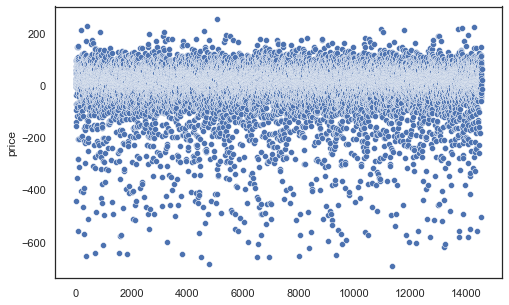

In [218]:
plt.figure(figsize=(8,5))

sns.scatterplot(np.linspace(0 , 14552 , 14553) , (y_pred*norm) - (y_test*norm))

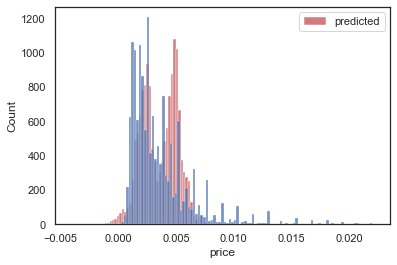

In [196]:
sns.histplot(y_pred , color='r' , label='predicted')
sns.histplot(y_test)
plt.legend()